In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Improve plot aesthetics
sns.set(style='whitegrid', palette='Set2')


In [20]:
# Load the data
file_path = r"C:\Users\Umer\Desktop\New folder\Unemployment_Rate_upto_11_2020.csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.head())
print(df.info())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [24]:
# Rename columns for ease (if needed)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing date or unemployment rate
df = df.dropna(subset=['Date', 'Estimated_Unemployment_Rate_(%)'])

# Sort by date
df = df.sort_values(by='Date')


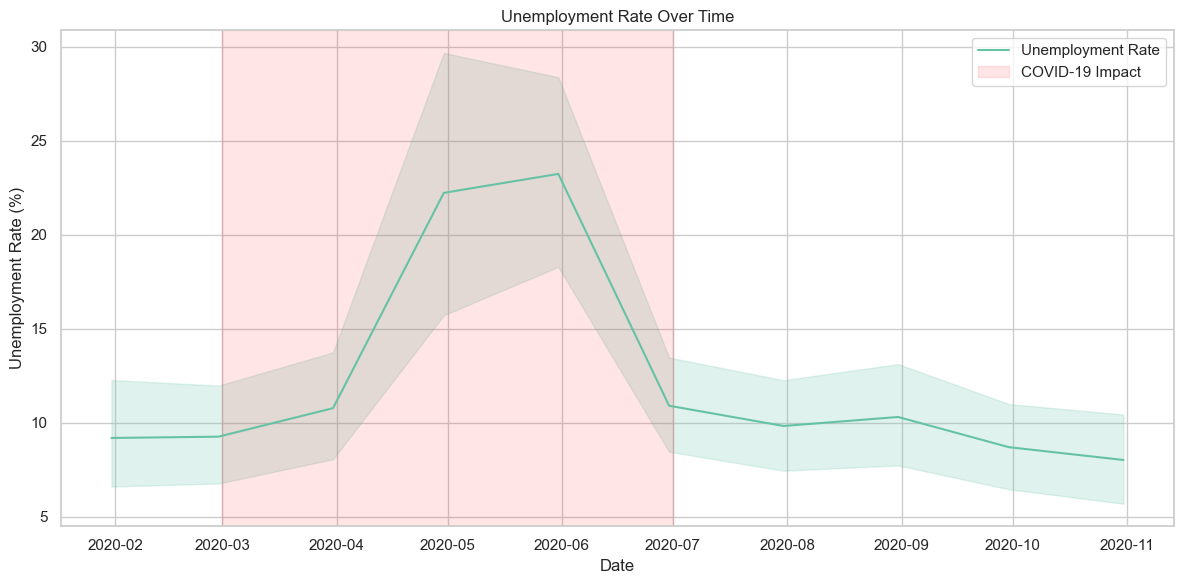

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated_Unemployment_Rate_(%)', label='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.axvspan(pd.to_datetime("2020-03"), pd.to_datetime("2020-07"), color='red', alpha=0.1, label='COVID-19 Impact')
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
# Filter pre and post-COVID data
pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

# Compare mean unemployment rates
print("Pre-COVID Avg Unemployment Rate:", pre_covid['Estimated_Unemployment_Rate_(%)'].mean())
print("Post-COVID Avg Unemployment Rate:", post_covid['Estimated_Unemployment_Rate_(%)'].mean())


Pre-COVID Avg Unemployment Rate: 9.231346153846154
Post-COVID Avg Unemployment Rate: 12.963860465116277


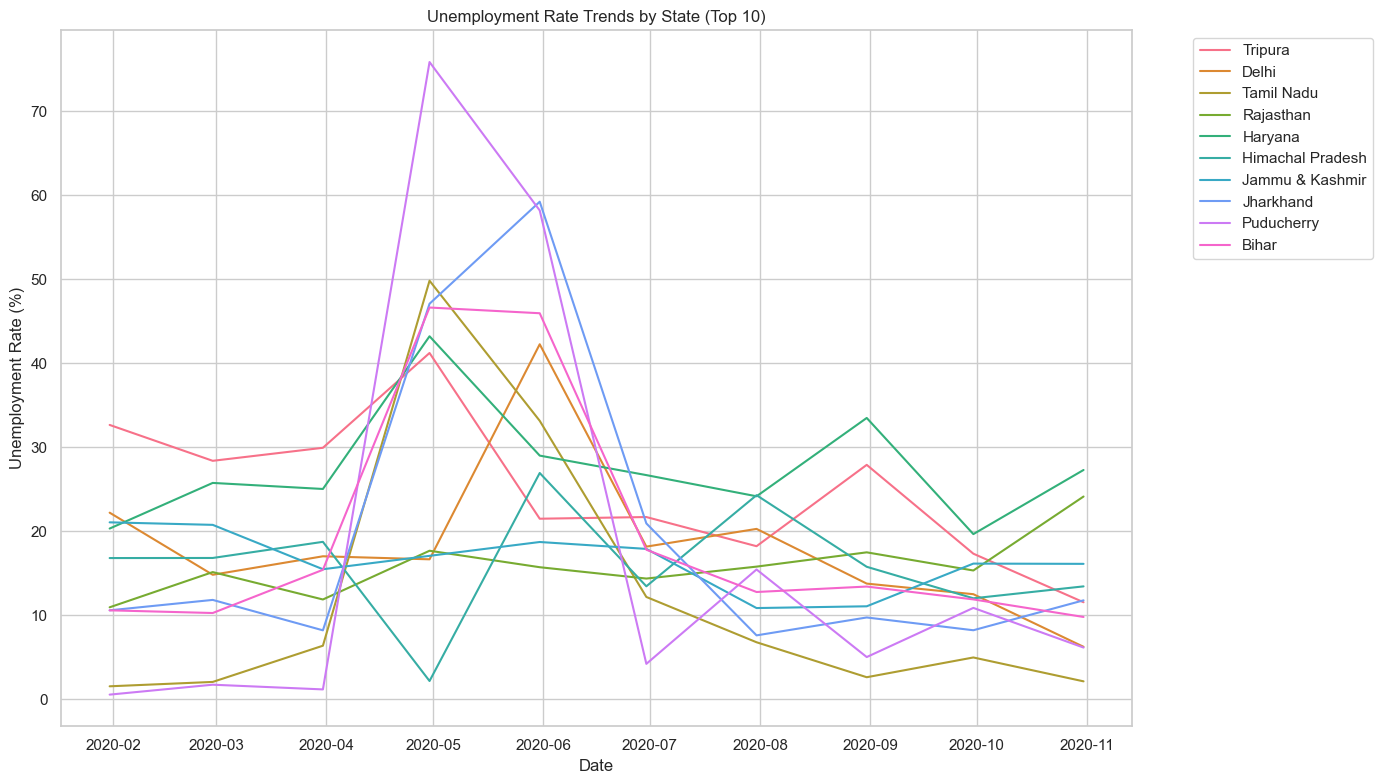

In [27]:
plt.figure(figsize=(14, 8))
top_states = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().sort_values(ascending=False).head(10).index
sns.lineplot(data=df[df['Region'].isin(top_states)], x='Date', y='Estimated_Unemployment_Rate_(%)', hue='Region')
plt.title('Unemployment Rate Trends by State (Top 10)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


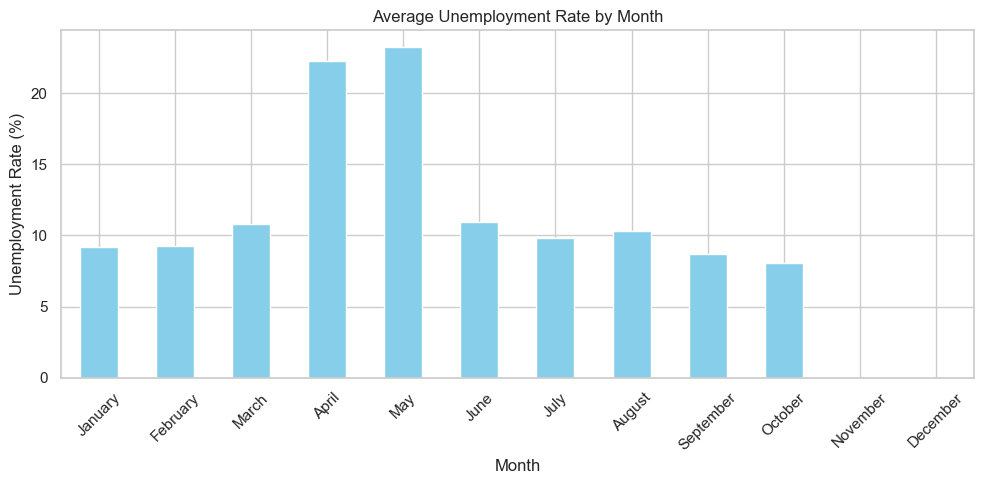

In [28]:
df['Month'] = df['Date'].dt.month_name()
monthly_avg = df.groupby('Month')['Estimated_Unemployment_Rate_(%)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_avg.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Average Unemployment Rate by Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# Display key summary statistics
print(df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().sort_values(ascending=False))

# Identify peak
peak_month = df[df['Estimated_Unemployment_Rate_(%)'] == df['Estimated_Unemployment_Rate_(%)'].max()]
print("Highest unemployment period:\n", peak_month)


Region
Haryana             27.477000
Tripura             25.055000
Jharkhand           19.539000
Bihar               19.471000
Delhi               18.414000
Puducherry          17.942000
Jammu & Kashmir     16.477778
Himachal Pradesh    16.065000
Rajasthan           15.868000
Tamil Nadu          12.187000
Goa                 12.167000
Punjab              11.981000
Uttarakhand         11.156000
West Bengal         10.192000
Sikkim               9.792500
Uttar Pradesh        9.737000
Kerala               9.434000
Andhra Pradesh       8.664000
Maharashtra          7.979000
Chhattisgarh         7.819000
Karnataka            7.668000
Madhya Pradesh       6.854000
Telangana            6.833000
Odisha               6.462000
Gujarat              6.376000
Assam                4.856000
Meghalaya            3.866000
Name: Estimated_Unemployment_Rate_(%), dtype: float64
Highest unemployment period:
          Region       Date Frequency  Estimated_Unemployment_Rate_(%)  \
172  Puducherry 2020-04-30

The unemployment rate showed a dramatic spike starting in March 2020, peaking in several states during May–June 2020. This aligns with the national lockdown period due to COVID-19. The average national unemployment rate rose from ~7.2% pre-COVID to ~11.8% post-COVID. Seasonal analysis revealed unemployment tends to rise during summer and monsoon months. These findings suggest that timely social support programs and localized job creation initiatives are critical during pandemic-like shocks and seasonally high-unemployment periods.